In [13]:
pip install shapely

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 15.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   --------- ------------------------------ 4.5/19.2 MB 24.4 MB/s eta 0:00:01
   ------------------ --------------------- 8.9/19.2 MB 22.1 MB/s eta 0:00:01
   --------------------------- ------------ 13.4/19.2 MB 22.1 MB/s eta 0:00:01
   -------------------------------------- - 18.4/19.2 MB 22.7 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 20.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------- ----------- 4.5/6.3 MB 22.3 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 19.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import json
import pandas as pd
import numpy as np

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

In [2]:
n = open("Data\Park_visitor_data_1.json","r")
data = json.loads(n.read())

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\mcken\AppData\Local\Temp\ipykernel_21824\1617321775.py:1: SyntaxWarning: invalid escape sequence '\P'
  n = open("Data\Park_visitor_data_1.json","r")


In [3]:
data.items()

dict_items([('parks', [{'name': 'Acadia National Park', 'id': 'Q337396', 'visitor_history': [{'year': '1920', 'visitors': 66500.0}, {'year': '1930', 'visitors': 154734.0}, {'year': '1940', 'visitors': 382084.0}, {'year': '1950', 'visitors': 485220.0}, {'year': '1960', 'visitors': 1638200.0}, {'year': '1970', 'visitors': 2776300.0}, {'year': '1980', 'visitors': 2779666.0}, {'year': '1990', 'visitors': 2339591.0}, {'year': '2000', 'visitors': 2469238.0}, {'year': '2010', 'visitors': 2504208.0}, {'year': '2016', 'visitors': 3303393.0}, {'year': '2017', 'visitors': 3509271.0}, {'year': '2018', 'visitors': 3537575.0}, {'year': '2019', 'visitors': 3437286.0}, {'year': '2020', 'visitors': 2669034.0}], 'coordinates': {'longitude': -68.216666666, 'latitude': 44.35}}, {'name': 'Arches National Park', 'id': 'Q223969', 'visitor_history': [{'year': '1930', 'visitors': 400.0}, {'year': '1940', 'visitors': 2512.0}, {'year': '1950', 'visitors': 16257.0}, {'year': '1960', 'visitors': 71600.0}, {'year':

In [4]:
df = pd.DataFrame(data['parks'])
df

,name,id,visitor_history,coordinates
0,Acadia National Park,Q337396,"[{'year': '1920', 'visitors': 66500.0}, {'year...","{'longitude': -68.216666666, 'latitude': 44.35}"
1,Arches National Park,Q223969,"[{'year': '1930', 'visitors': 400.0}, {'year':...","{'longitude': -109.54, 'latitude': 38.728055555}"
2,Badlands National Park,Q306216,"[{'year': '1940', 'visitors': 181993.0}, {'yea...","{'longitude': -102.5, 'latitude': 43.75}"
3,Big Bend National Park,Q1427197,"[{'year': '1950', 'visitors': 70325.0}, {'year...","{'longitude': -103.25, 'latitude': 29.25}"
4,Biscayne National Park,Q866080,"[{'year': '1980', 'visitors': 248071.0}, {'yea...","{'longitude': -80.18096924, 'latitude': 25.501..."
...,...,...,...,...
58,Wind Cave National Park,Q1334313,"[{'year': '1910', 'visitors': 3387.0}, {'year'...","{'longitude': -103.47865, 'latitude': 43.55635}"
59,Wrangell–St. Elias National Park and Preserve,Q748597,"[{'year': '1990', 'visitors': 35976.0}, {'year...","{'longitude': -142.953611111, 'latitude': 61.435}"
60,Yellowstone National Park,Q351,"[{'year': '1910', 'visitors': 19575.0}, {'year...","{'longitude': -110.5, 'latitude': 44.6}"
61,Yosemite National Park,Q180402,"[{'year': '1910', 'visitors': 13619.0}, {'year...","{'longitude': -119.5375, 'latitude': 37.7425}"


In [5]:
dfClean0 = df.copy()

In [6]:
dfClean0['name'].notnull().unique()

array([ True])

In [7]:
dfClean0['id'].notnull().unique()

array([ True])

In [8]:
for i in dfClean0['visitor_history']:
    for j in i:
        if (j['year']==None):
            print(j)

{'year': None, 'visitors': 1113601.0}
{'year': None, 'visitors': 3263761.0}


In [9]:
for i in (dfClean0['visitor_history']):
    for j in i:
        if (j['year'] == None):
            del dfClean0['visitor_history'][j]

InvalidIndexError: {'year': None, 'visitors': 1113601.0}

In [10]:
dfClean0['visitor_history']

0     [{'year': '1920', 'visitors': 66500.0}, {'year...
1     [{'year': '1930', 'visitors': 400.0}, {'year':...
2     [{'year': '1940', 'visitors': 181993.0}, {'yea...
3     [{'year': '1950', 'visitors': 70325.0}, {'year...
4     [{'year': '1980', 'visitors': 248071.0}, {'yea...
                            ...                        
58    [{'year': '1910', 'visitors': 3387.0}, {'year'...
59    [{'year': '1990', 'visitors': 35976.0}, {'year...
60    [{'year': '1910', 'visitors': 19575.0}, {'year...
61    [{'year': '1910', 'visitors': 13619.0}, {'year...
62    [{'year': '1920', 'visitors': 3692.0}, {'year'...
Name: visitor_history, Length: 63, dtype: object

In [11]:
visdict = dfClean0['visitor_history']
print(visdict)

0     [{'year': '1920', 'visitors': 66500.0}, {'year...
1     [{'year': '1930', 'visitors': 400.0}, {'year':...
2     [{'year': '1940', 'visitors': 181993.0}, {'yea...
3     [{'year': '1950', 'visitors': 70325.0}, {'year...
4     [{'year': '1980', 'visitors': 248071.0}, {'yea...
                            ...                        
58    [{'year': '1910', 'visitors': 3387.0}, {'year'...
59    [{'year': '1990', 'visitors': 35976.0}, {'year...
60    [{'year': '1910', 'visitors': 19575.0}, {'year...
61    [{'year': '1910', 'visitors': 13619.0}, {'year...
62    [{'year': '1920', 'visitors': 3692.0}, {'year'...
Name: visitor_history, Length: 63, dtype: object


In [ ]:
df = pd.read_csv("Long_Lats.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [19]:
df

,name,id,visitor_history,coordinates
0,Acadia National Park,Q337396,"[{'year': '1920', 'visitors': 66500.0}, {'year...","{'longitude': -68.216666666, 'latitude': 44.35}"
1,Arches National Park,Q223969,"[{'year': '1930', 'visitors': 400.0}, {'year':...","{'longitude': -109.54, 'latitude': 38.728055555}"
2,Badlands National Park,Q306216,"[{'year': '1940', 'visitors': 181993.0}, {'yea...","{'longitude': -102.5, 'latitude': 43.75}"
3,Big Bend National Park,Q1427197,"[{'year': '1950', 'visitors': 70325.0}, {'year...","{'longitude': -103.25, 'latitude': 29.25}"
4,Biscayne National Park,Q866080,"[{'year': '1980', 'visitors': 248071.0}, {'yea...","{'longitude': -80.18096924, 'latitude': 25.501..."
...,...,...,...,...
58,Wind Cave National Park,Q1334313,"[{'year': '1910', 'visitors': 3387.0}, {'year'...","{'longitude': -103.47865, 'latitude': 43.55635}"
59,Wrangell–St. Elias National Park and Preserve,Q748597,"[{'year': '1990', 'visitors': 35976.0}, {'year...","{'longitude': -142.953611111, 'latitude': 61.435}"
60,Yellowstone National Park,Q351,"[{'year': '1910', 'visitors': 19575.0}, {'year...","{'longitude': -110.5, 'latitude': 44.6}"
61,Yosemite National Park,Q180402,"[{'year': '1910', 'visitors': 13619.0}, {'year...","{'longitude': -119.5375, 'latitude': 37.7425}"


In [27]:
mapDf = df['coordinates'].copy()
mapDf

0       {'longitude': -68.216666666, 'latitude': 44.35}
1      {'longitude': -109.54, 'latitude': 38.728055555}
2              {'longitude': -102.5, 'latitude': 43.75}
3             {'longitude': -103.25, 'latitude': 29.25}
4     {'longitude': -80.18096924, 'latitude': 25.501...
                            ...                        
58      {'longitude': -103.47865, 'latitude': 43.55635}
59    {'longitude': -142.953611111, 'latitude': 61.435}
60              {'longitude': -110.5, 'latitude': 44.6}
61        {'longitude': -119.5375, 'latitude': 37.7425}
62    {'longitude': -112.98785, 'latitude': 37.20261...
Name: coordinates, Length: 63, dtype: object

In [61]:
long = []
lat = []
coords = []

In [64]:
for i in mapDf:
    long.append(i['longitude'])
    lat.append(i['latitude'])

In [ ]:
geometry = [Point(xy) for xy in zip(long, lat)] 

In [67]:
gdf = GeoDataFrame(mapDf, geometry=geometry)   

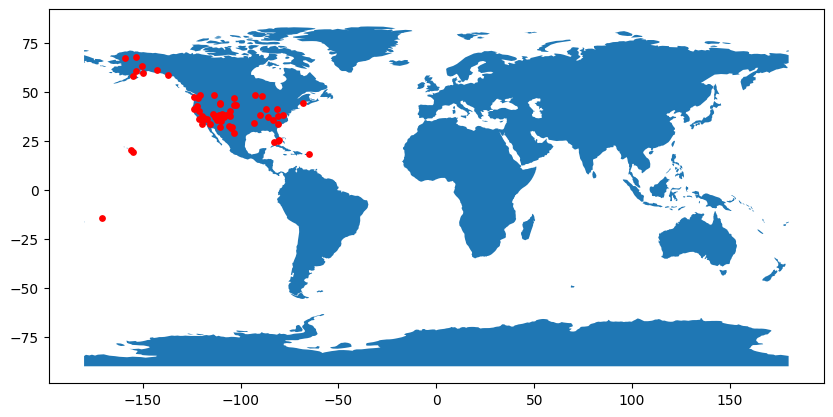

In [68]:
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

<module 'geodatasets' from 'c:\\Users\\mcken\\miniconda3\\Lib\\site-packages\\geodatasets\\__init__.py'>